In [37]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [38]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('alamos.txt', skiprows=20, sep='\s+',header=None,names=["DD/MM/AAAA","PRECIP","EVAP","TMAX","TMIN"])
# "Shift + Enter

In [39]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df0['FECHA'] = pd.to_datetime(df0.apply(lambda x: x['DD/MM/AAAA'], 1), dayfirst=True)
df0 = df0.drop(['DD/MM/AAAA'], 1)

In [40]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,PRECIP,EVAP,TMAX,TMIN,FECHA
0,0.0,2.0,22.5,6.0,1961-01-01
1,0.0,1.1,25.0,9.0,1961-01-02
2,0.0,3.4,27.5,9.0,1961-01-03
3,0.0,2.4,27.5,11.0,1961-01-04
4,7.4,6.0,22.0,13.5,1961-01-05


In [41]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [42]:
df.dtypes

PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
FECHA     datetime64[ns]
dtype: object

In [43]:
df0.PRECIP

0        0.0
1        0.0
2        0.0
3        0.0
4        7.4
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16      11.0
17       9.5
18      20.5
19      14.2
20       0.0
21       6.0
22      16.4
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
30       0.0
31       0.0
32       0.0
33       0.0
34       0.0
35       0.0
36       0.0
37       0.0
38       0.0
39       0.0
40       0.0
41       0.0
42       0.0
43       0.0
44       0.0
45       0.0
46       0.0
47       0.0
48       0.0
49       0.0
50       0.0
51       0.0
52       0.0
53       0.0
54       0.0
55       0.0
56       0.0
57       0.0
58       0.0
59       0.0
60       0.0
61       0.0
62       0.0
63       0.0
64       0.0
65       0.0
66       0.0
67       0.0
68       0.0
69       0.0
70       0.0
71       0.0
72       0.0
73       0.0
74       0.0
75       0.0
76       0.0

In [44]:
df0["MES"]=df0["FECHA"].dt.month

In [45]:
df0["AÑO"]=df0["FECHA"].dt.year

In [46]:
df.head()

,PRECIP,EVAP,TMAX,TMIN,FECHA,MES,AÑO
0,0.0,2.0,22.5,6.0,1961-01-01,1,1961
1,0.0,1.1,25.0,9.0,1961-01-02,1,1961
2,0.0,3.4,27.5,9.0,1961-01-03,1,1961
3,0.0,2.4,27.5,11.0,1961-01-04,1,1961
4,7.4,6.0,22.0,13.5,1961-01-05,1,1961


In [47]:
pd.options.display.max_rows=1000

In [48]:
#hacer for loop para que segun el mes nos de la suma 
for i in range(1,13):
    PRECIP_MES= df.loc[df["MES"]==i,"PRECIP"].sum()
    print("MES",i,np.round(PRECIP_MES,decimals=1),"mm")

MES 1 805.8 mm
MES 2 411.7 mm
MES 3 391.7 mm
MES 4 39.4 mm
MES 5 89.0 mm
MES 6 585.9 mm
MES 7 4055.7 mm
MES 8 4558.9 mm
MES 9 1984.5 mm
MES 10 1169.1 mm
MES 11 577.8 mm
MES 12 813.6 mm


In [49]:
PRECIP_MES=(805.8,411.7,391.7,39.4,89.0,585.9,4055.7,4558.9,1984.5,1169.1,577.8,813.6)

In [50]:
ind = np.arange(len(PRECIP_MES))  # the x locations for the groups
width = 0.35  # the width of the bars

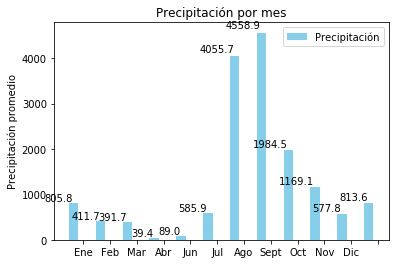

In [51]:
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, PRECIP_MES, width,
                color='SkyBlue', label='Precipitación')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precipitación promedio')
ax.set_title('Precipitación por mes')
ax.set_xticks(ind)
ax.set_xticklabels(('Ene', 'Feb', 'Mar', 'Abr', 'Jun','Jul','Ago','Sept','Oct','Nov'
                   ,'Dic'))
ax.legend()

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")


plt.show()

In [52]:
PRECIPSUM=[]
FECHA=[]
for i in range(1961,1984):
        PRECIPAÑO =  df.loc[df['AÑO'] == i, 'PRECIP'].sum()
        PRECIPSUM.append(np.round(PRECIPAÑO,decimals=1))
        FECHA.append(i)
        print('AÑO',i,np.round(PRECIPAÑO,decimals=1),'')
        
        
print(PRECIPSUM)
print(FECHA)

AÑO 1961 727.2 
AÑO 1962 599.3 
AÑO 1963 668.4 
AÑO 1964 509.3 
AÑO 1965 765.0 
AÑO 1966 0.0 
AÑO 1967 608.1 
AÑO 1968 835.4 
AÑO 1969 646.6 
AÑO 1970 520.8 
AÑO 1971 747.0 
AÑO 1972 717.4 
AÑO 1973 495.9 
AÑO 1974 891.2 
AÑO 1975 387.7 
AÑO 1976 503.8 
AÑO 1977 606.5 
AÑO 1978 633.0 
AÑO 1979 329.8 
AÑO 1980 664.4 
AÑO 1981 1155.3 
AÑO 1982 881.9 
AÑO 1983 883.9 
[727.2, 599.3, 668.4, 509.3, 765.0, 0.0, 608.1, 835.4, 646.6, 520.8, 747.0, 717.4, 495.9, 891.2, 387.7, 503.8, 606.5, 633.0, 329.8, 664.4, 1155.3, 881.9, 883.9]
[1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983]


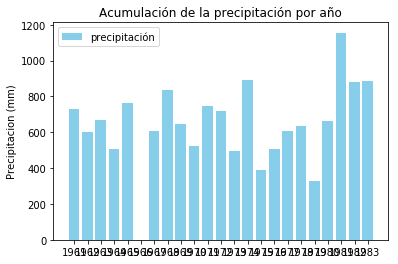

In [53]:
ind=np.arange(len(PRECIPSUM))
width= .035


fig, ax = plt.subplots()
rects1=ax.bar(ind - width/2, PRECIPSUM, color='SkyBlue',label='precipitación')

#agreagamos nombres a los ejes
ax.set_ylabel('Precipitacion (mm)')
ax.set_title('Acumulación de la precipitación por año')
ax.set_xticks(ind)
ax.set_xticklabels((FECHA))
                   
ax.legend()
                   
#def autolabel(rects, xpos='center'):

    #xpos = xpos.lower()  # normalize the case of the parameter
    #ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    #offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    #for rect in rects:
      #  height = rect.get_height()
       # ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
        #        '{}'.format(height), ha=ha[xpos], va='bottom')


#autolabel(rects1, "left")
                   
plt.show()

In [54]:
max(ind)

22

In [55]:
df.head()

,PRECIP,EVAP,TMAX,TMIN,FECHA,MES,AÑO
0,0.0,2.0,22.5,6.0,1961-01-01,1,1961
1,0.0,1.1,25.0,9.0,1961-01-02,1,1961
2,0.0,3.4,27.5,9.0,1961-01-03,1,1961
3,0.0,2.4,27.5,11.0,1961-01-04,1,1961
4,7.4,6.0,22.0,13.5,1961-01-05,1,1961


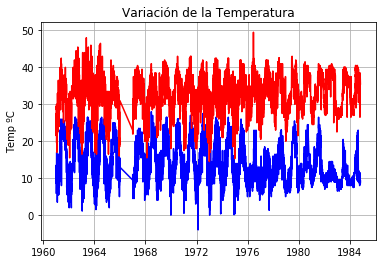

In [56]:
plt.plot_date(x=df.FECHA, y=df.TMIN, fmt="b-")
plt.plot_date(x=df.FECHA, y=df.TMAX, fmt="r-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

Text(0, 0.5, 'Temp °C')

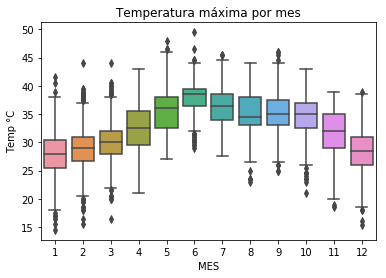

In [57]:
ax = sns.boxplot(x="MES", y="TMAX", data=df)
plt.title("Temperatura máxima por mes")
plt.ylabel ("Temp °C")

Text(0, 0.5, 'Temp °C')

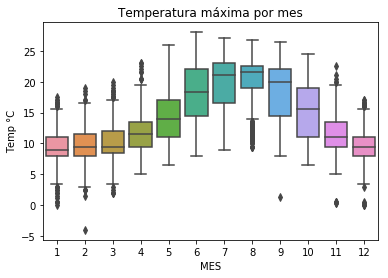

In [58]:
ax = sns.boxplot(x="MES", y="TMIN", data=df)
plt.title("Temperatura máxima por mes")
plt.ylabel ("Temp °C")

Text(0, 0.5, 'Temp °C')

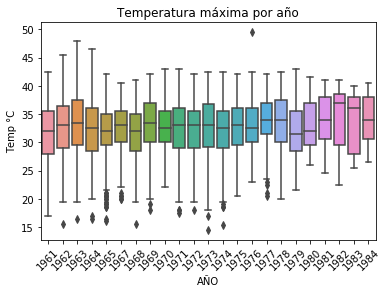

In [62]:
ax = sns.boxplot(x="AÑO", y="TMAX", data=df)
plt.xticks(rotation=45)
plt.title("Temperatura máxima por año")
plt.ylabel ("Temp °C")

Text(0, 0.5, 'Temp °C')

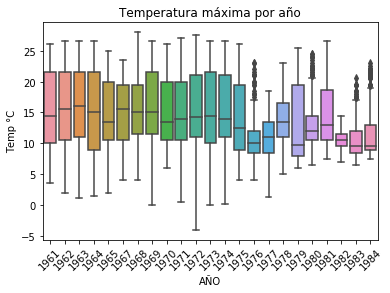

In [63]:
ax = sns.boxplot(x="AÑO", y="TMIN", data=df)
plt.xticks(rotation=45)
plt.title("Temperatura máxima por año")
plt.ylabel ("Temp °C")